<a href="https://colab.research.google.com/github/cindylrs04/PCVK25_3F_06/blob/main/Week5_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cindy Laili Larasati - 06

# PERCOBAAN PRAKTIKUM

D-1 Percobaan Histogram

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

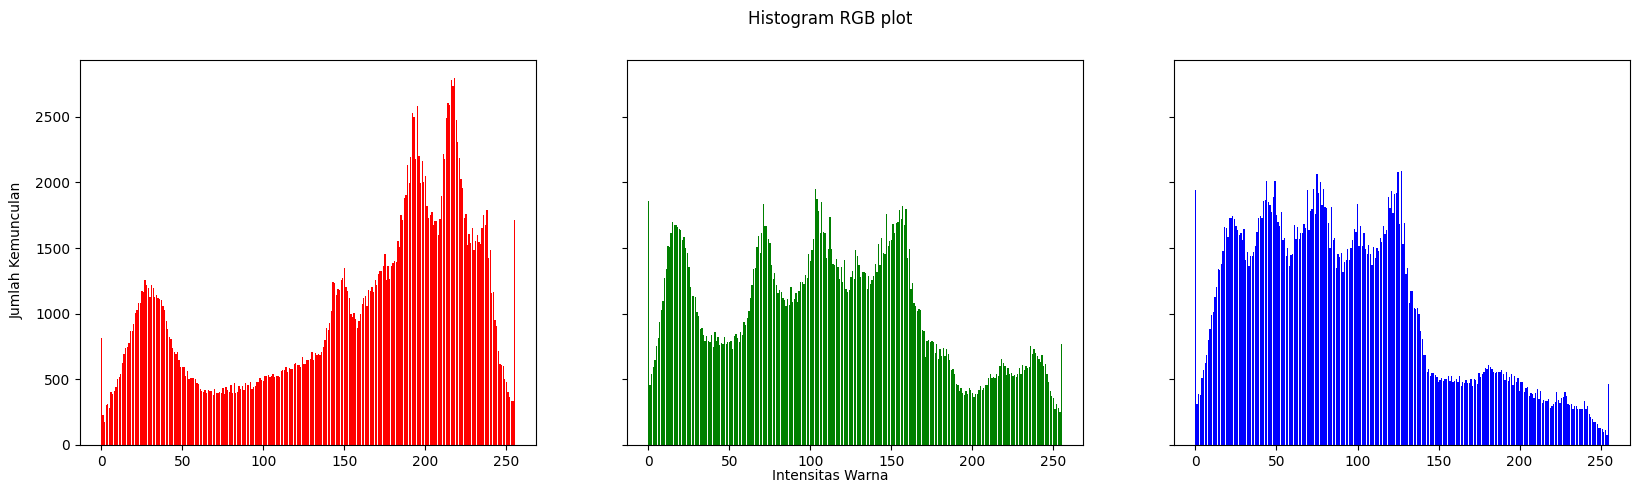

In [4]:
#1 Membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

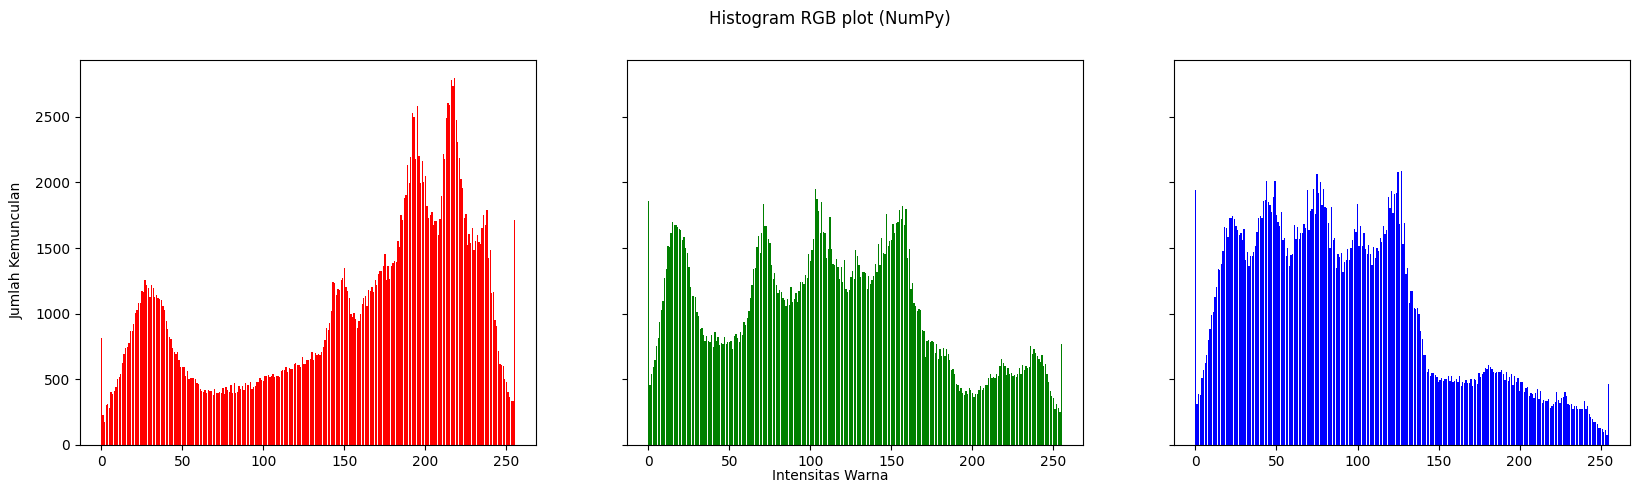

In [6]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# Hitung histogram menggunakan NumPy
red_hist, _ = np.histogram(red_channel, bins=256, range=(0,256))
green_hist, _ = np.histogram(green_channel, bins=256, range=(0,256))
blue_hist, _ = np.histogram(blue_channel, bins=256, range=(0,256))

names = np.arange(256)

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')

plt.show()

Output sama, karena sama-sama menghitung jumlah piksel pada setiap tingkat intensitas warna. Perbedaannya hanya pada metode perhitungan: cara manual membutuhkan waktu lebih lama, sedangkan NumPy mampu melakukannya lebih cepat.

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

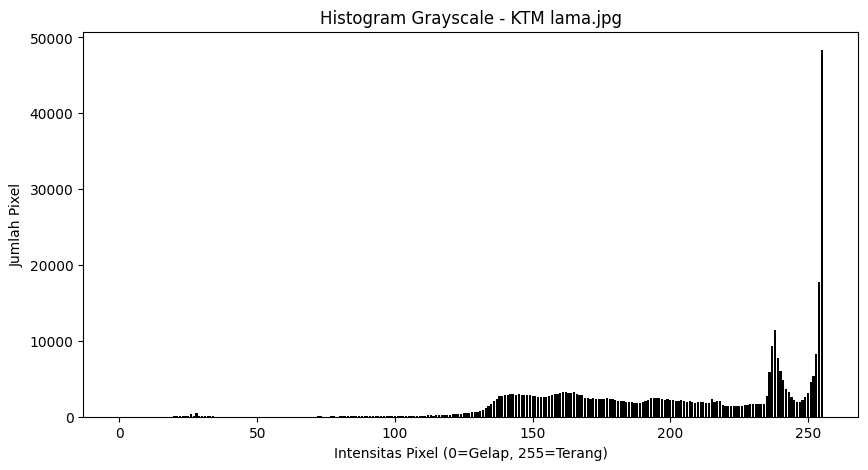

In [14]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Hitung histogram
hist, bins = np.histogram(gray.flatten(), bins=256, range=(0,256))

plt.figure(figsize=(10,5))
plt.title("Histogram Grayscale - KTM lama.jpg")
plt.xlabel("Intensitas Pixel (0=Gelap, 255=Terang)")
plt.ylabel("Jumlah Pixel")
plt.bar(np.arange(256), hist, color='black')
plt.show()

Gambar terlihat lebih cenderung terang karena sebagian besar piksel punya nilai intensitas tinggi. Tapi, sebaran intensitasnya tidak merata dan banyak menumpuk di sisi kanan, sehingga gambar bisa jadi punya kontras rendah di bagian terang

D-2 PERCOBAAN HISTOGRAM EQUALIZATION

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

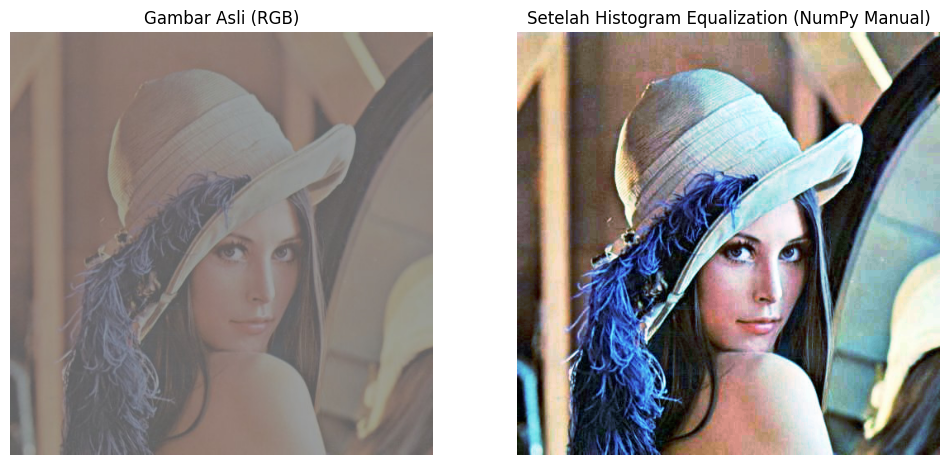

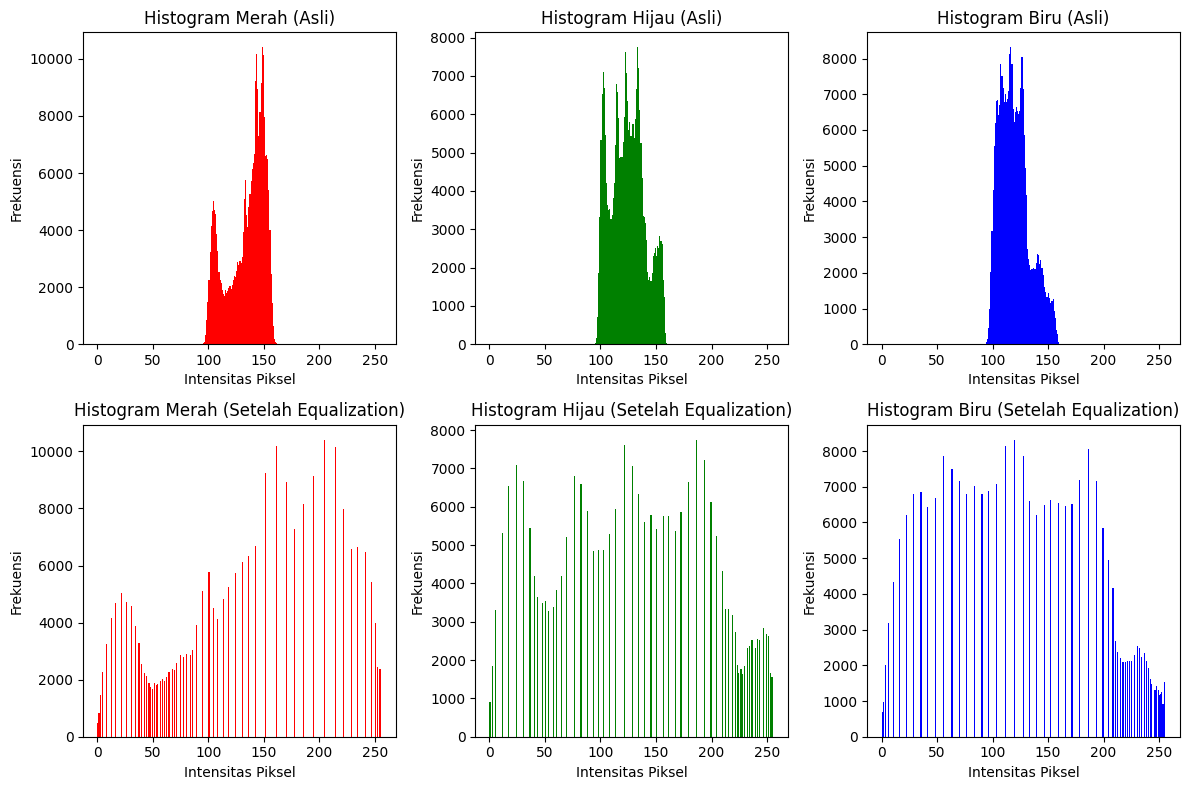

In [38]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img_rgb)

def equalize_manual(channel):
    # Hitung histogram
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])

    cdf = hist.cumsum()

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    img_equalized = cdf_normalized[channel]

    return img_equalized

r_eq = equalize_manual(r)
g_eq = equalize_manual(g)
b_eq = equalize_manual(b)

img_eq_manual = cv.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq_manual)
plt.title("Setelah Histogram Equalization (NumPy Manual)")
plt.axis("off")

plt.show()

plt.figure(figsize=(12, 8))

# Histogram sebelum equalization
plt.subplot(2, 3, 1)
plt.hist(r.ravel(), bins=256, range=[0,256], color='red')
plt.title('Histogram Merah (Asli)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 2)
plt.hist(g.ravel(), bins=256, range=[0,256], color='green')
plt.title('Histogram Hijau (Asli)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 3)
plt.hist(b.ravel(), bins=256, range=[0,256], color='blue')
plt.title('Histogram Biru (Asli)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Histogram setelah equalization manual
plt.subplot(2, 3, 4)
plt.hist(r_eq.ravel(), bins=256, range=[0,256], color='red')
plt.title('Histogram Merah (Setelah Equalization)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 5)
plt.hist(g_eq.ravel(), bins=256, range=[0,256], color='green')
plt.title('Histogram Hijau (Setelah Equalization)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 6)
plt.hist(b_eq.ravel(), bins=256, range=[0,256], color='blue')
plt.title('Histogram Biru (Setelah Equalization)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini.

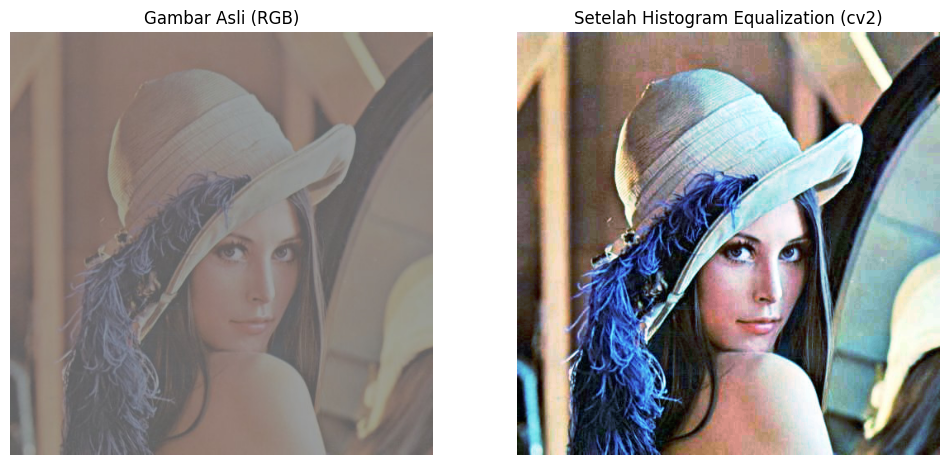

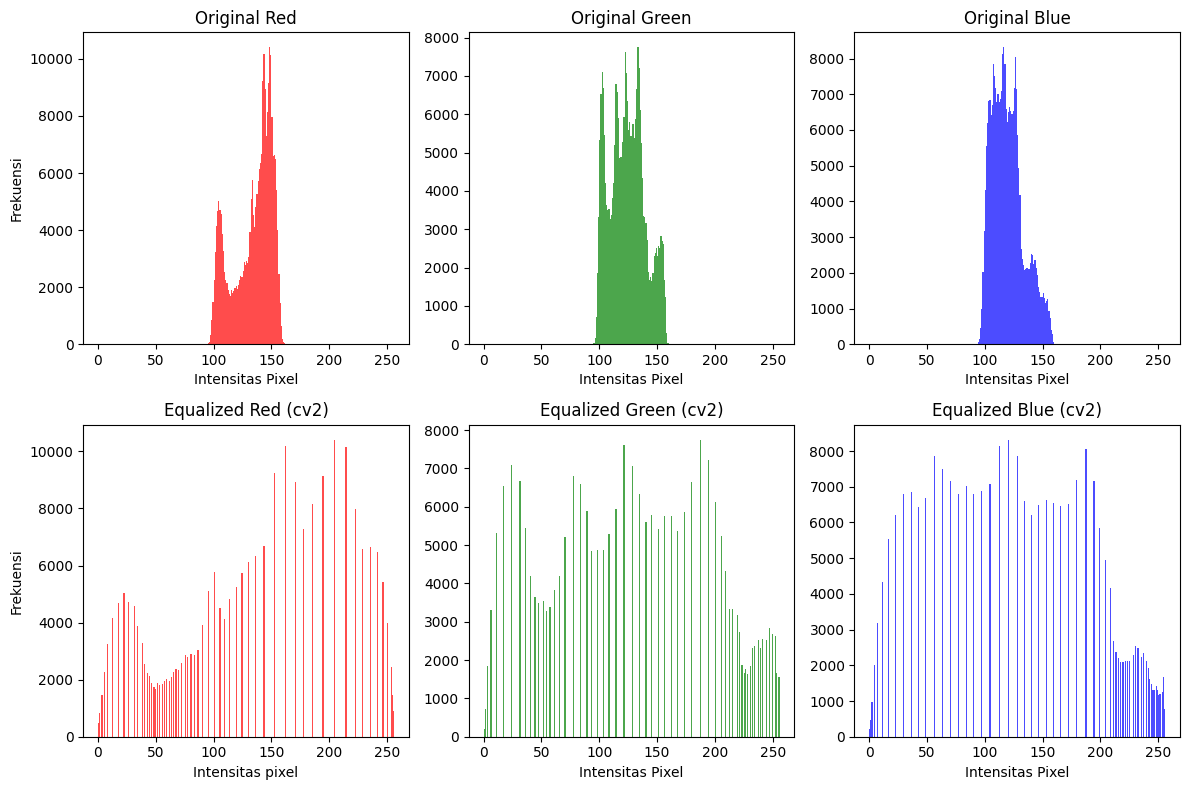

In [36]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena_lc.jpg')

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

b, g, r = cv.split(image)

b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

image_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))

image_equalized_rgb = cv.cvtColor(image_equalized_bgr, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image_equalized_rgb)
plt.title("Setelah Histogram Equalization (cv2)")
plt.axis("off")

plt.show()

plt.figure(figsize=(12, 8))

# Original histograms (RGB)
plt.subplot(2, 3, 1)
plt.hist(r.ravel(), bins=256, range=[0,256], color='red', alpha=0.7)
plt.title('Original Red')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 2)
plt.hist(g.ravel(), bins=256, range=[0,256], color='green', alpha=0.7)
plt.title('Original Green')
plt.xlabel('Intensitas Pixel')

plt.subplot(2, 3, 3)
plt.hist(b.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
plt.title('Original Blue')
plt.xlabel('Intensitas Pixel')


# Equalized histograms (RGB)
plt.subplot(2, 3, 4)
plt.hist(r_equalized.ravel(), bins=256, range=[0,256], color='red', alpha=0.7)
plt.title('Equalized Red (cv2)')
plt.xlabel('Intensitas pixel')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 5)
plt.hist(g_equalized.ravel(), bins=256, range=[0,256], color='green', alpha=0.7)
plt.title('Equalized Green (cv2)')
plt.xlabel('Intensitas Pixel')

plt.subplot(2, 3, 6)
plt.hist(b_equalized.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
plt.title('Equalized Blue (cv2)')
plt.xlabel('Intensitas Pixel')

plt.tight_layout()
plt.show()

Output dari equalization manual NumPy dan bawaan OpenCV (cv.equalizeHist) pada dasarnya sama, karena keduanya memakai algoritma yang identik. Bedanya hanya di cara pengerjaan: NumPy dihitung manual lebih panjang, sedangkan OpenCV langsung otomatis dengan satu fungsi.

PERTANYAAN PRAKTIKUM D2

1. Perbandingan Citra Lena

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

MSE (RGB): 1042.89
PSNR (RGB): 17.95 dB


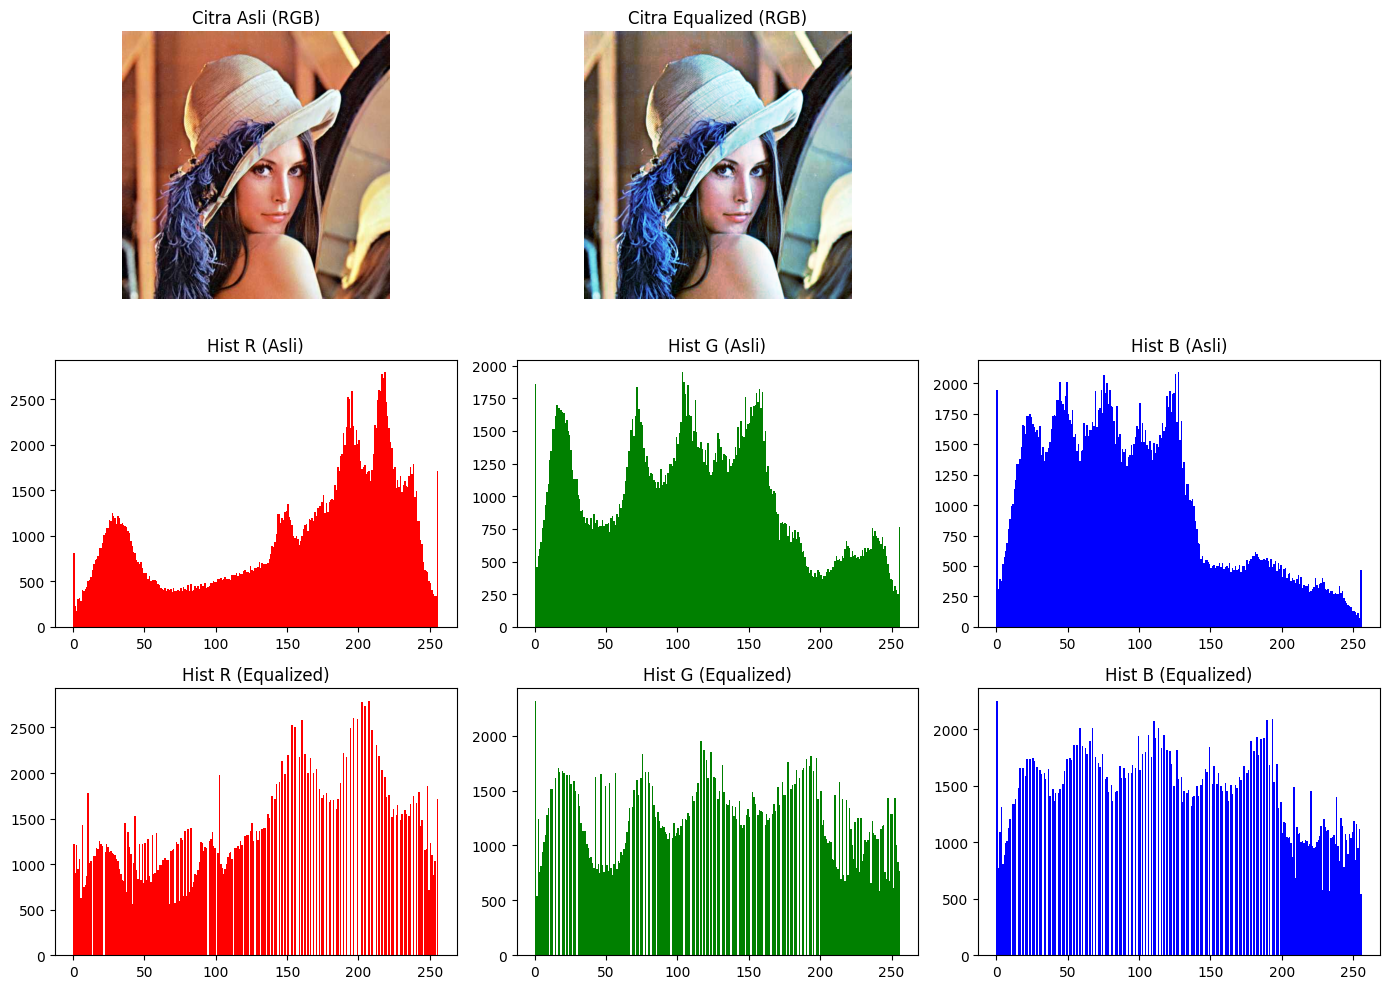

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

img_eq = cv2.merge([r_eq, g_eq, b_eq])

# Hitung MSE & PSNR
mse = np.mean((img.astype(np.float64) - img_eq.astype(np.float64)) ** 2)
psnr = float('inf') if mse == 0 else 10 * np.log10((255 ** 2) / mse)

print(f"MSE (RGB): {mse:.2f}")
print(f"PSNR (RGB): {psnr:.2f} dB")

plt.figure(figsize=(14,10))

# Baris 1: citra asli dan equalized
plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Citra Asli (RGB)")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(img_eq)
plt.title("Citra Equalized (RGB)")
plt.axis("off")

# Baris 2: histogram RGB asli
plt.subplot(3,3,4)
plt.hist(r.ravel(), bins=256, range=[0,256], color='red')
plt.title("Hist R (Asli)")

plt.subplot(3,3,5)
plt.hist(g.ravel(), bins=256, range=[0,256], color='green')
plt.title("Hist G (Asli)")

plt.subplot(3,3,6)
plt.hist(b.ravel(), bins=256, range=[0,256], color='blue')
plt.title("Hist B (Asli)")

# Baris 3: histogram RGB equalized
plt.subplot(3,3,7)
plt.hist(r_eq.ravel(), bins=256, range=[0,256], color='red')
plt.title("Hist R (Equalized)")

plt.subplot(3,3,8)
plt.hist(g_eq.ravel(), bins=256, range=[0,256], color='green')
plt.title("Hist G (Equalized)")

plt.subplot(3,3,9)
plt.hist(b_eq.ravel(), bins=256, range=[0,256], color='blue')
plt.title("Hist B (Equalized)")

plt.tight_layout()
plt.show()

jawab:

a. Histogram equalization pada citra Lena membuat distribusi warna lebih merata, sehingga citra tampak lebih kontras dibandingkan citra aslinya.

b. Nilai PSNR antara citra asli dan hasil equalization adalah sekitar 17,95 dB.

c. Nilai PSNR ini tergolong rendah, artinya secara matematis citra hasil equalization cukup berbeda dari citra asli. Namun secara visual kualitasnya tidak jelek, justru detail pada area gelap maupun terang menjadi lebih jelas meskipun warna bisa terlihat agak berlebihan.


2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

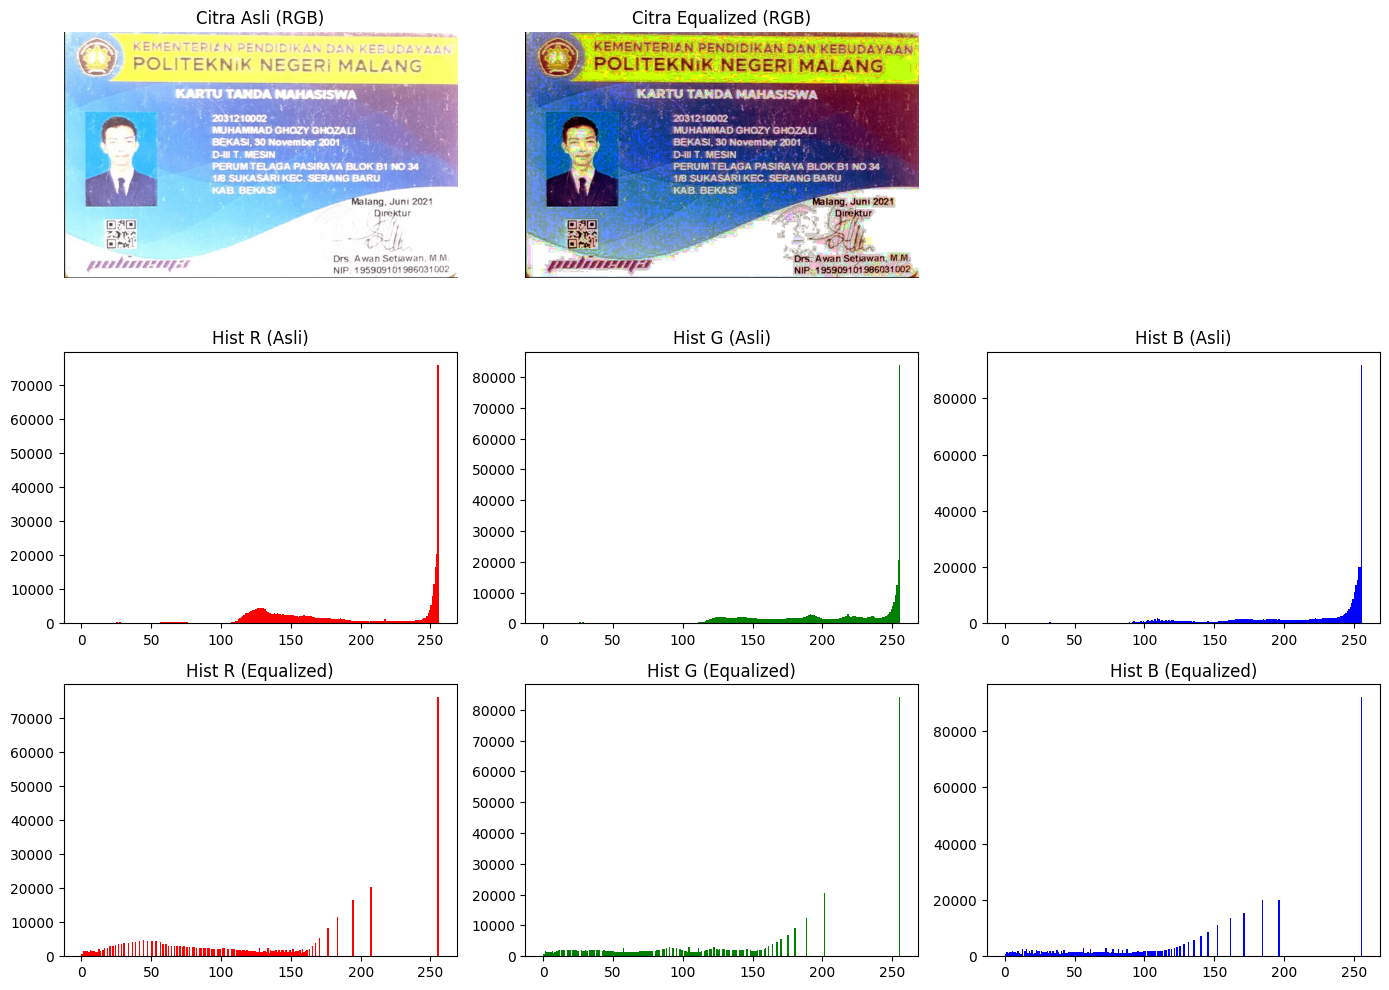

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

img_eq = cv2.merge([r_eq, g_eq, b_eq])

plt.figure(figsize=(14,10))

# Baris 1: Citra asli & equalized
plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Citra Asli (RGB)")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(img_eq)
plt.title("Citra Equalized (RGB)")
plt.axis("off")

# Baris 2: Histogram RGB Asli
plt.subplot(3,3,4)
plt.hist(r.ravel(), bins=256, range=[0,256], color='red')
plt.title("Hist R (Asli)")

plt.subplot(3,3,5)
plt.hist(g.ravel(), bins=256, range=[0,256], color='green')
plt.title("Hist G (Asli)")

plt.subplot(3,3,6)
plt.hist(b.ravel(), bins=256, range=[0,256], color='blue')
plt.title("Hist B (Asli)")

# Baris 3: Histogram RGB Equalized
plt.subplot(3,3,7)
plt.hist(r_eq.ravel(), bins=256, range=[0,256], color='red')
plt.title("Hist R (Equalized)")

plt.subplot(3,3,8)
plt.hist(g_eq.ravel(), bins=256, range=[0,256], color='green')
plt.title("Hist G (Equalized)")

plt.subplot(3,3,9)
plt.hist(b_eq.ravel(), bins=256, range=[0,256], color='blue')
plt.title("Hist B (Equalized)")

plt.tight_layout()
plt.show()

jawab:

c. Setelah histogram equalization, citra KTM lama tampak lebih kontras. Detail wajah, teks, dan latar belakang jadi lebih jelas terbaca dibanding citra asli. Namun, peningkatan kontras ini membuat warna terlihat lebih keras dan kurang natural.
